# Anne Griffin Final Project 3

### Hypothesis/Problem Statement

(type here)

#### Step 1: Load Python Libraries

In [1]:
#imports
from __future__ import division
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import sklearn.linear_model as lm
from sklearn import feature_selection, linear_model
from datetime import datetime
from dateutil.parser import parse
%matplotlib inline

/Users/annegriffin/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Step 2: Reading my datasets

In [84]:
raw_train_data = pd.read_csv("../data/train_users_2.csv")  
raw_test_data = pd.read_csv("../data/test_users.csv") 
raw_bkts_data = pd.read_csv("../data/age_gender_bkts.csv") 
#train_data = pd.DataFrame(r_train_data, index = ['-unknown', 'NaN'])

In [85]:
raw_test_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


#### Step 3: Cleaning my data

In [89]:
#scrub a dub dub
# also watch out for type errors, things that are a string and need to be an int
train_data = raw_train_data.dropna()
test_data = raw_test_data.dropna(subset=['age'])
train_data = train_data[train_data.gender != '-unknown-'] #dropping "-unknown-" value for gender
test_data = test_data[test_data.gender != '-unknown-']
#pd.to_datetime(train_data['date_first_booking']) #converting dates from strings into dates
train_data["age"] = train_data["age"].astype(int) #converting age from a float to an int
test_data["age"] = test_data["age"].astype(int)
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


In [83]:
test_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser


In [4]:
train_data.drop(train_data[train_data.age > 100].index, inplace=True) #dropping people older than 100
train_data.drop(train_data[train_data.age < 14].index, inplace=True) #dropping people younger than 14

In [5]:
train_data.sort_values(['age'], ascending = False, inplace=True)
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
45927,dt3z0yznow,2012-10-23,20121023215110,2012-10-24,FEMALE,100,facebook,12,en,api,other,untracked,iOS,Windows Desktop,Firefox,US
58678,hkfkm15avw,2013-02-02,20130202172823,2013-02-02,FEMALE,100,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,US
156038,0icboe9ie7,2014-02-23,20140223210934,2014-02-23,MALE,100,facebook,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Chrome,US
163735,kpj7p8vg8d,2014-03-16,20140316024129,2014-03-16,FEMALE,100,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,US
185270,ep9bpt3zv3,2014-05-06,20140506161243,2014-05-06,MALE,100,basic,0,en,content,google,omg,Web,Windows Desktop,IE,US


In [74]:
test_data.drop(test_data[train_data.age > 100].index, inplace=True) #dropping people older than 100
test_data.drop(test_data[train_data.age < 14].index, inplace=True) #dropping people younger than 14

/Users/annegriffin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/annegriffin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55372 entries, 45927 to 140381
Data columns (total 16 columns):
id                         55372 non-null object
date_account_created       55372 non-null object
timestamp_first_active     55372 non-null int64
date_first_booking         55372 non-null object
gender                     55372 non-null object
age                        55372 non-null int64
signup_method              55372 non-null object
signup_flow                55372 non-null int64
language                   55372 non-null object
affiliate_channel          55372 non-null object
affiliate_provider         55372 non-null object
first_affiliate_tracked    55372 non-null object
signup_app                 55372 non-null object
first_device_type          55372 non-null object
first_browser              55372 non-null object
country_destination        55372 non-null object
dtypes: int64(3), object(13)
memory usage: 7.2+ MB


In [91]:
train_data.gender = pd.Categorical(train_data.gender).codes #making gender a catagorical variable
test_data.gender = pd.Categorical(test_data.gender).codes

In [8]:
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
45927,dt3z0yznow,2012-10-23,20121023215110,2012-10-24,0,100,facebook,12,en,api,other,untracked,iOS,Windows Desktop,Firefox,US
58678,hkfkm15avw,2013-02-02,20130202172823,2013-02-02,0,100,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,US
156038,0icboe9ie7,2014-02-23,20140223210934,2014-02-23,1,100,facebook,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Chrome,US
163735,kpj7p8vg8d,2014-03-16,20140316024129,2014-03-16,0,100,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,US
185270,ep9bpt3zv3,2014-05-06,20140506161243,2014-05-06,1,100,basic,0,en,content,google,omg,Web,Windows Desktop,IE,US


In [82]:
test_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser


In [9]:
#raw_bkts_data.head(10)

In [10]:
#getting dummies for country destinations
dummy_countries = pd.get_dummies(train_data['country_destination'], prefix='country')
dummy_countries.head()

,country_AU,country_CA,country_DE,country_ES,country_FR,country_GB,country_IT,country_NL,country_PT,country_US,country_other
45927,0,0,0,0,0,0,0,0,0,1,0
58678,0,0,0,0,0,0,0,0,0,1,0
156038,0,0,0,0,0,0,0,0,0,1,0
163735,0,0,0,0,0,0,0,0,0,1,0
185270,0,0,0,0,0,0,0,0,0,1,0


In [78]:
train_data.country_destination = pd.Categorical(train_data.country_destination).codes
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,0,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,9
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,0,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,10
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,0,46,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,9
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,0,47,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,9
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,0,50,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,9


In [12]:
key_variables = train_data[['age', 'gender']].join(dummy_countries.ix[:, 'country_AU':])
key_variables.head()

/Users/annegriffin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,age,gender,country_AU,country_CA,country_DE,country_ES,country_FR,country_GB,country_IT,country_NL,country_PT,country_US,country_other
45927,100,0,0,0,0,0,0,0,0,0,0,1,0
58678,100,0,0,0,0,0,0,0,0,0,0,1,0
156038,100,1,0,0,0,0,0,0,0,0,0,1,0
163735,100,0,0,0,0,0,0,0,0,0,0,1,0
185270,100,1,0,0,0,0,0,0,0,0,0,1,0


In [13]:
pred_variables = train_data[['age','gender', 'country_destination']]
pred_variables.head()

,age,gender,country_destination
45927,100,0,9
58678,100,0,9
156038,100,1,9
163735,100,0,9
185270,100,1,9


#### Step 4: Visualizing Data

###### Distribution of Variables

In [14]:
#to do
pd.factorize(train_data['gender'])


(array([0, 0, 1, ..., 0, 0, 1]), Int64Index([0, 1, 2], dtype='int64'))

In [15]:
my_tab = pd.crosstab(index=train_data["gender"],  # Make a crosstab
                              columns="count") 
my_tab

col_0,count
gender,
0,29385
1,25828
2,159


In [16]:
#train_data[['age']].plot(kind='box'); #this showed me we had some extreme outliers

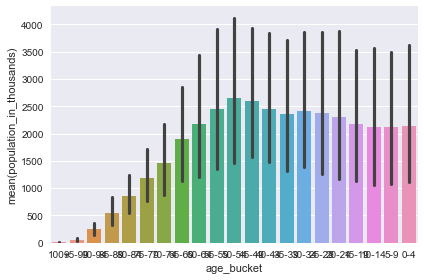

In [17]:
sns.barplot(x='age_bucket', y='population_in_thousands', data=raw_bkts_data)
sns.despine()
plt.tight_layout()
# this is for both genders
#plt.savefig('../content/images/vis-barplot.svg', transparent=True)

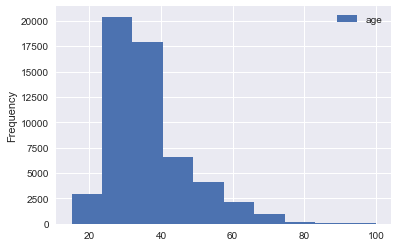

In [18]:
train_data[["age"]].plot(kind="hist");

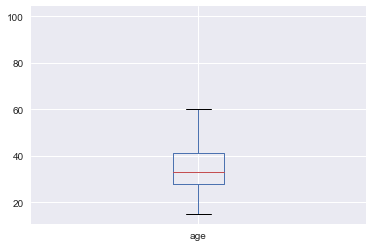

In [19]:
train_data[['age']].plot(kind='box');

In [20]:
train_data.sort_values('age', ascending = False).head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
45927,dt3z0yznow,2012-10-23,20121023215110,2012-10-24,0,100,facebook,12,en,api,other,untracked,iOS,Windows Desktop,Firefox,9
58678,hkfkm15avw,2013-02-02,20130202172823,2013-02-02,0,100,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,9
156038,0icboe9ie7,2014-02-23,20140223210934,2014-02-23,1,100,facebook,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Chrome,9
163735,kpj7p8vg8d,2014-03-16,20140316024129,2014-03-16,0,100,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,9
185270,ep9bpt3zv3,2014-05-06,20140506161243,2014-05-06,1,100,basic,0,en,content,google,omg,Web,Windows Desktop,IE,9


In [21]:
bucketf = raw_bkts_data.loc[raw_bkts_data['gender'] == 'female']
bucketf.head()

,age_bucket,country_destination,gender,population_in_thousands,year
21,100+,AU,female,4.0,2015.0
22,95-99,AU,female,25.0,2015.0
23,90-94,AU,female,94.0,2015.0
24,85-89,AU,female,179.0,2015.0
25,80-84,AU,female,252.0,2015.0


In [22]:
bucketm = raw_bkts_data.loc[raw_bkts_data['gender'] == 'male']
bucketm.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [23]:
bucketm

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


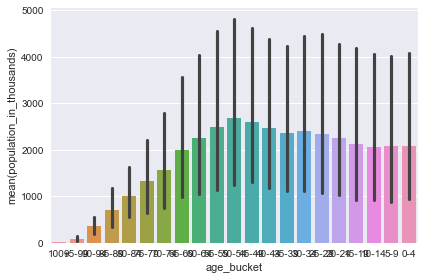

In [24]:
sns.barplot(x='age_bucket', y='population_in_thousands', data=bucketf)
sns.despine()
plt.tight_layout()
#this is only for women

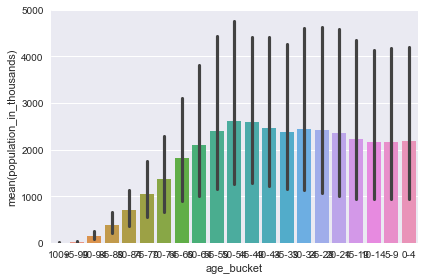

In [25]:
sns.barplot(x='age_bucket', y='population_in_thousands', data=bucketm)
sns.despine()
plt.tight_layout()
#this is only for men

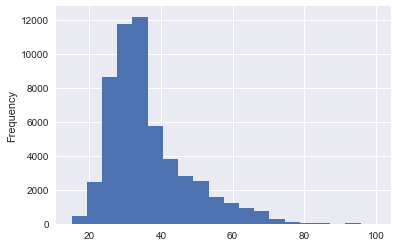

In [26]:
train_data['age'].plot(kind='hist', bins = 20)

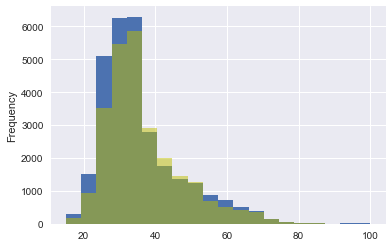

In [27]:
f_train_data = train_data.loc[train_data['gender'] == 0]
m_train_data = train_data.loc[train_data['gender'] == 1]
f_train_data['age'].plot(kind='hist', bins = 20)
m_train_data['age'].plot(kind='hist', bins = 20, color = 'y', alpha = 0.5)

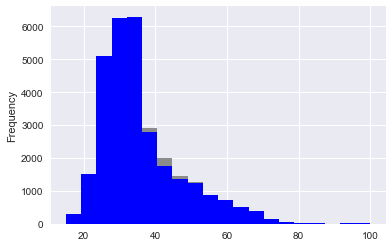

In [28]:
m_train_data['age'].plot(kind='hist', bins = 20, color = '0.55')
f_train_data['age'].plot(kind='hist', bins = 20, color = 'b')

######  Relationship Between Independent Variables and Dependent Variable

In [29]:
#to do

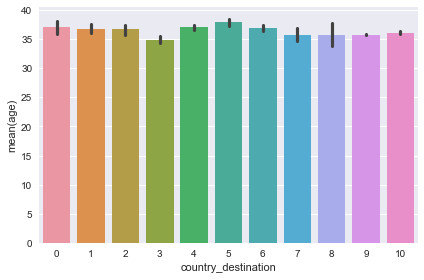

In [30]:
sns.barplot(x='country_destination', y='age', data=train_data)
sns.despine()
plt.tight_layout()

In [31]:
gender_groups = train_data.groupby(['gender', 'country_destination'])

In [32]:
gender_groups.size()

gender  country_destination
0       0                        193
        1                        419
        2                        324
        3                        791
        4                       1784
        5                        812
        6                        997
        7                        228
        8                         70
        9                      20883
        10                      2884
1       0                        172
        1                        442
        2                        389
        3                        615
        4                       1227
        5                        634
        6                        638
        7                        259
        8                         63
        9                      18181
        10                      3208
2       0                          1
        1                          5
        2                          3
        3                          4
        4 

In [33]:
age_groups = train_data.groupby(['age', 'country_destination'])

In [34]:
age_groups.size()

age  country_destination
15   9                        2
16   9                        1
17   5                        1
     9                        2
18   0                        1
     1                        8
     2                        7
     3                        1
     4                        9
     5                        4
     6                        9
     7                        3
     9                      106
     10                      24
19   0                        5
     1                       10
     2                        4
     3                       12
     4                       22
     5                        9
     6                        9
     7                        3
     8                        3
     9                      189
     10                      30
20   0                        1
     1                        1
     2                        1
     3                        8
     4                        7
               

In [35]:
len(train_data)

55372

In [36]:
#df = train_data.pivot_table(index='country_destination', columns='age', values='gender', aggfunc=np.median)
#sns.heatmap(df, annot=True, fmt=".1f")

In [37]:
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
45927,dt3z0yznow,2012-10-23,20121023215110,2012-10-24,0,100,facebook,12,en,api,other,untracked,iOS,Windows Desktop,Firefox,9
58678,hkfkm15avw,2013-02-02,20130202172823,2013-02-02,0,100,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,9
156038,0icboe9ie7,2014-02-23,20140223210934,2014-02-23,1,100,facebook,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Chrome,9
163735,kpj7p8vg8d,2014-03-16,20140316024129,2014-03-16,0,100,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,9
185270,ep9bpt3zv3,2014-05-06,20140506161243,2014-05-06,1,100,basic,0,en,content,google,omg,Web,Windows Desktop,IE,9


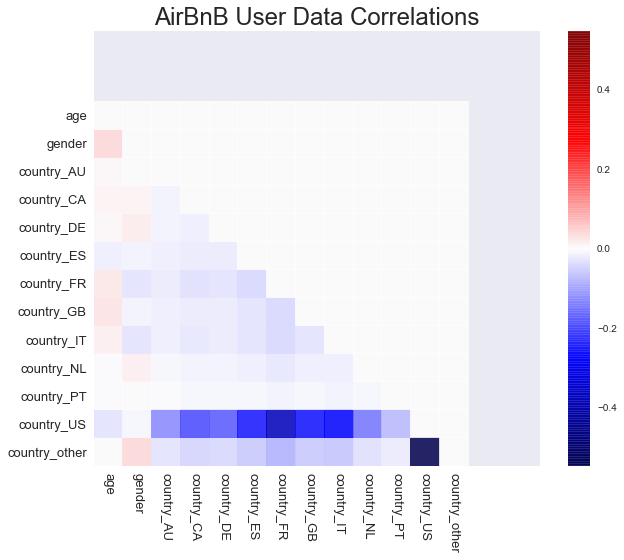

In [38]:
plt.figure(figsize = (10, 8))
corr_mat = np.tril(key_variables.corr(), k=-1)
sns.heatmap(corr_mat, cmap = 'seismic', alpha = 0.85)
plt.title('AirBnB User Data Correlations', fontsize = 24)
plt.xticks(np.arange(0.5, len(train_data.columns) + 0.5, 1), key_variables.columns, fontsize = 13, rotation = 270)
plt.yticks(np.arange(0.5, len(train_data.columns) + 0.5, 1), list(key_variables.columns)[::-1], fontsize = 13, \
           rotation = 0)
plt.show()

### Model

In [39]:
X = train_data[['age', 'gender']]
y = train_data['country_destination']
#lm = linear_model.LinearRegression()
lm = smf.ols(formula='y ~ X', data=train_data).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     30.47
Date:                Mon, 25 Sep 2017   Prob (F-statistic):           5.92e-14
Time:                        18:29:47   Log-Likelihood:            -1.2102e+05
No. Observations:               55372   AIC:                         2.420e+05
Df Residuals:                   55369   BIC:                         2.421e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3360      0.032    260.925      0.000       8.273       8.399
X[0]          -0.0051      0.001     -6.165      0.000      -0.007      -0.003
X[1]           0.0913      0.018      5.034      0.000       0.056       0.127
==============================================================================
Omnibus:                    20663.950   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60437.919
Skew:                          -2.033   Prob(JB):                         0.00
Kurtosis:                       6.108   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#turn country destination into classifier
#try linear regression
#try random forrest


In [41]:
#grid search


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

model = RandomForestClassifier(n_estimators = 20)


#param_grid = {
#    'n_estimators': [200, 700],
#    'max_features': ['auto', 'sqrt', 'log2']
#}

#CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)

X = pred_variables[['age', 'gender']]
y = pred_variables['country_destination']
#X.drop('country_destination', axis=1, inplace=True)


    
# Use `fit` to learn the vocabulary of the titles
#CV_model.fit(X, y)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV

model = RandomForestRegressor(n_estimators = 20)


#param_grid = {
#    'n_estimators': [200, 700],
#    'max_features': ['auto', 'sqrt', 'log2']
#}

#CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)

X = pred_variables[['age', 'gender']]
y = pred_variables['country_destination']
#X.drop('country_destination', axis=1, inplace=True)


    
# Use `fit` to learn the vocabulary of the titles
#CV_model.fit(X, y)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [100]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head() 

#print '\n',CV_model.best_estimator_



,Features,Importance Score
0,age,1.0


In [102]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

mean_squared_error(X, y)
#scores = cross_val_score(model, X, y, scoring='roc_auc')
#print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

#auc_scores = {}
#for n_trees in range(1, 100, 10):
#    model = RandomForestClassifier(n_estimators = n_trees)
#    scores = cross_val_score(model, X, y, scoring='roc_auc')
#    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))
#    auc_scores[n_trees] = scores.mean()
#pd.Series(auc_scores, name='AUC Scores').plot();


#roc = {label: [] for label in train_data.country_destination.unique()}
#for label in train_data.country_destination.unique():
    #model.fit(X, y)
    #predictions_proba = model.predict_proba(test_data[["age", "gender"]])
    #roc[label] += roc_auc_score(test_data[["age", "gender"]], predictions_proba[:,1])

901.94901755399837

In [94]:
predictions_proba = model.predict_proba(test_data[["age", "gender"]])

In [95]:
predictions_proba

array([[ 0.00341006,  0.01364024,  0.00937766, ...,  0.00085251,
         0.72037511,  0.11594203],
       [ 0.00879397,  0.00942211,  0.00942211, ...,  0.00188442,
         0.75565327,  0.08668342],
       [ 0.0137931 ,  0.0137931 ,  0.02413793, ...,  0.        ,
         0.65862069,  0.15172414],
       ..., 
       [ 0.        ,  0.00564972,  0.02824859, ...,  0.01129944,
         0.70056497,  0.12429379],
       [ 0.0045283 ,  0.01962264,  0.01433962, ...,  0.00226415,
         0.75622642,  0.10037736],
       [ 0.00364964,  0.01094891,  0.03649635, ...,  0.        ,
         0.67153285,  0.10583942]])

In [ ]:
#outstanding questions
# how to do the roc for the random forrest
# how to visualize the equivalent of the .size() output for country
# are my features telling me age is a bigger predictor?